In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
try:
    from google.colab import drive
    my_path = 'drive/My Drive/techlabs/'
    drive.mount('/content/drive')
except:
    my_path = 'dados/'

Mounted at /content/drive


In [3]:
df = pd.read_pickle(my_path + 'final-3.6.pkl.xz')

df = df.reset_index(drop=True)
print(f'Shape: {df.shape}')
print(f'Memory: {df.memory_usage().sum() // (1024**2) + 1} MB')
display(df.head())

Shape: (3931570, 42)
Memory: 383 MB


,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,NO_MUNICIPIO_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,NO_MUNICIPIO_PROVA,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q022,Q023,Q024,Q025,IN_ESPECIALIZADO,IN_ESPECIFICO,IN_RECURSO
0,Santarém,PA,21,M,1,3,4,NaN,NaN,1,3,1,NaN,0,Santarém,PA,472.899994,466.000000,497.299988,369.100006,0,1,780.0,D,E,A,A,7,B,A,B,C,A,A,B,D,A,B,A,False,False,False
1,Mãe do Rio,PA,16,F,1,3,1,Paragominas,PA,3,0,1,NaN,1,Mãe do Rio,PA,358.899994,495.399994,482.299988,416.500000,1,1,600.0,D,E,A,A,5,B,A,B,C,A,A,B,B,A,A,A,False,False,False
2,Paragominas,PA,18,F,1,1,1,Paragominas,PA,2,0,3,1,0,Paragominas,PA,574.200012,538.700012,582.599976,571.500000,0,1,640.0,H,E,A,D,3,C,D,E,E,C,A,B,D,A,C,B,False,False,False
3,Ananindeua,PA,31,M,1,1,1,Belém,PA,1,7,1,1,0,Belém,PA,522.000000,592.599976,582.000000,605.299988,1,1,580.0,C,C,C,D,5,C,A,B,C,A,A,B,D,A,A,A,False,False,False
4,Marabá,PA,30,F,2,3,1,Marabá,PA,1,10,1,1,0,Marabá,PA,407.399994,480.100006,464.299988,581.500000,1,1,360.0,B,B,A,A,4,C,A,B,B,A,B,B,B,A,A,B,False,False,False


In [4]:
df.columns

Index(['NO_MUNICIPIO_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'NO_MUNICIPIO_NASCIMENTO', 'SG_UF_NASCIMENTO', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'NO_MUNICIPIO_PROVA', 'SG_UF_PROVA', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_LINGUA', 'TP_STATUS_REDACAO',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
       'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q022', 'Q023', 'Q024',
       'Q025', 'IN_ESPECIALIZADO', 'IN_ESPECIFICO', 'IN_RECURSO'],
      dtype='object')

## Avaliar relação de colunas com as notas

Foram separadas as seguintes colunas para eu avaliar

| Coluna | Descrição |
| --- | --- |
| IN_ESPECIALIZADO | Deficiência ou outras necessidades especiais |
| IN_ESPECIFICO | Gestante, Lactante, Idoso, Unidade Hospitalar |
| IN_RECURSO | Obteve algum tipo de recurso |
| Q005 | Incluindo você, quantas pessoas moram atualmente em sua residência? |
| Q006 | Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.) |
| Q007 | Em sua residência trabalha empregado(a) doméstico(a)? |
| Q008 | Na sua residência tem banheiro? |                     
| Q009 | Na sua residência tem quartos para dormir? |
| Q010 | Na sua residência tem carro? |                        
| Q011 | Na sua residência tem motocicleta? |                  
| Q012 | Na sua residência tem geladeira? | 
| TP_ESCOLA | Tipo de escola do Ensino Médio |                 
| TP_ENSINO | Tipo de instituição que concluiu ou concluirá o Ensino Médio |


In [5]:
labels = {
  'Q005': 'Quantas pessoas moram na residencia?',
  'Q006': 'Renda mensal de sua família',
  'Q007': 'Em sua residência trabalha empregado(a) doméstico(a)?',
  'Q008': 'Na sua residência tem banheiro?',
  'Q009': 'Na sua residência tem quartos para dormir?',
  'Q010': 'Na sua residência tem carro?',
  'Q011': 'Na sua residência tem motocicleta?',
  'Q012': 'Na sua residência tem geladeira?',
}

In [6]:
# Colunas separadas para mim
colunas = [
  'IN_ESPECIALIZADO', 'IN_ESPECIFICO', 'IN_RECURSO',
  'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012',
  'TP_ESCOLA', 'TP_ENSINO'
]

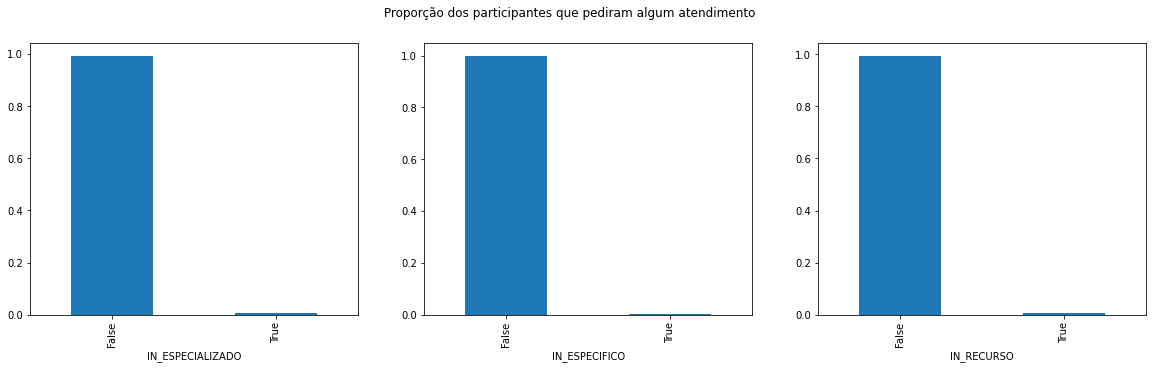

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))

idx = 0
variavel = 'IN_ESPECIALIZADO'
df[variavel].value_counts(normalize=True).plot.bar(ax=axs[idx])
axs[idx].set_xlabel(variavel)

idx = 1
variavel = 'IN_ESPECIFICO'
df[variavel].value_counts(normalize=True).plot.bar(ax=axs[idx])
axs[idx].set_xlabel(variavel)

idx = 2
variavel = 'IN_RECURSO'
df[variavel].value_counts(normalize=True).plot.bar(ax=axs[idx])
axs[idx].set_xlabel(variavel)
plt.suptitle('Proporção dos participantes que pediram algum atendimento')
plt.show()

In [8]:
import json

with open(my_path + 'categorias.json', 'r') as f:
    c = json.load(f)
    categorias = {
        **c['participante'], **c['escola'], **c['especializado'], **c['especifico'],
        **c['recurso'], **c['local_prova'], **c['prova'], **c['redacao'], **c['socioeconomico']
    }

In [9]:
variavel = 'TP_ESCOLA'
tabela = pd.DataFrame({
    'descricao': list(pd.Series(categorias[variavel])),
    'frequencia': list(df[variavel].value_counts()),
    'porcentagem': list(df[variavel].value_counts(normalize=True))
})
print(variavel)
display(tabela)

TP_ESCOLA


,descricao,frequencia,porcentagem
0,Não Respondeu,2651991,0.674537
1,Pública,1068876,0.271870
2,Privada,210703,0.053593
3,Exterior,0,0.000000


In [10]:
variavel = 'TP_ENSINO'
tabela = pd.DataFrame({
    'descricao': list(pd.Series(categorias[variavel])),
    'frequencia': list(df[variavel].value_counts()),
    'porcentagem': list(df[variavel].value_counts(normalize=True))
})
print(variavel)
display(tabela)

TP_ENSINO


,descricao,frequencia,porcentagem
0,Ensino Regular,2227282,0.995708
1,Educação Especial - Modalidade Substitutiva,9600,0.004292
2,Educação de Jovens e Adultos,0,0.000000


In [11]:
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
natureza, humanas, linguagens, matematica, redacao = provas

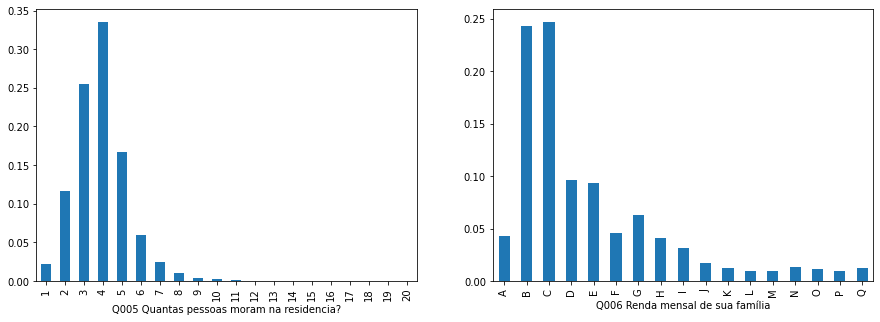

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
variavel = 'Q005'
df[variavel].value_counts(normalize=True).sort_index().plot.bar(ax=axs[0])
axs[0].set_xlabel(f'{variavel} {labels[variavel]}')

variavel = 'Q006'
df[variavel].value_counts(normalize=True).sort_index().plot.bar(ax=axs[1])
axs[1].set_xlabel(f'{variavel} {labels[variavel]}')

plt.show()

In [13]:
(df['Q005'] < 5).value_counts(normalize=True)

True     0.729381
False    0.270619
Name: Q005, dtype: float64

In [14]:
variavel = 'Q006'
tabela = pd.DataFrame({
    'descricao': list(pd.Series(categorias[variavel])),
    'frequencia': list(df[variavel].value_counts().sort_index()),
    'porcentagem': list(df[variavel].value_counts(normalize=True).sort_index())
})
tabela['acumulado'] = tabela['porcentagem'].cumsum()
print(variavel, labels[variavel])
display(tabela)

Q006 Renda mensal de sua família


,descricao,frequencia,porcentagem,acumulado
0,Nenhuma renda.,169886,0.043211,0.043211
1,"Até R$ 998,00.",955872,0.243127,0.286338
2,"De R$ 998,01 até R$ 1.497,00.",969353,0.246556,0.532894
3,"De R$ 1.497,01 até R$ 1.996,00.",379495,0.096525,0.629419
4,"De R$ 1.996,01 até R$ 2.495,00.",366442,0.093205,0.722624
5,"De R$ 2.495,01 até R$ 2.994,00.",181380,0.046134,0.768759
6,"De R$ 2.994,01 até R$ 3.992,00.",245555,0.062457,0.831216
7,"De R$ 3.992,01 até R$ 4.990,00.",161456,0.041067,0.872282
8,"De R$ 4.990,01 até R$ 5.988,00.",122720,0.031214,0.903496
9,"De R$ 5.988,01 até R$ 6.986,00.",69416,0.017656,0.921152


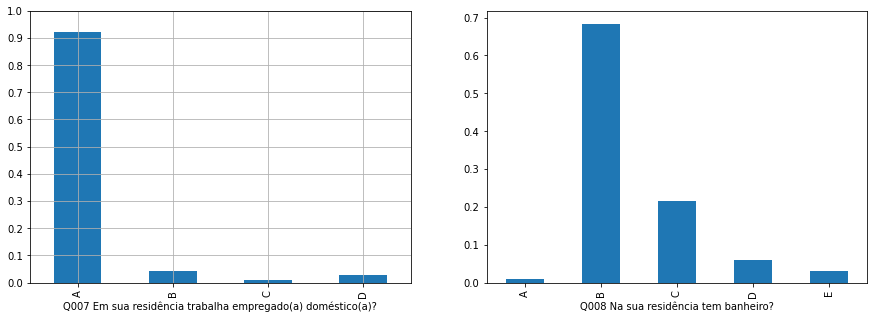

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
variavel = 'Q007'
df[variavel].value_counts(normalize=True).sort_index().plot.bar(ax=axs[0], yticks=np.arange(0, 1.1, 0.1), grid=True)
axs[0].set_xlabel(f'{variavel} {labels[variavel]}')

variavel = 'Q008'
df[variavel].value_counts(normalize=True).sort_index().plot.bar(ax=axs[1])
axs[1].set_xlabel(f'{variavel} {labels[variavel]}')

plt.show()

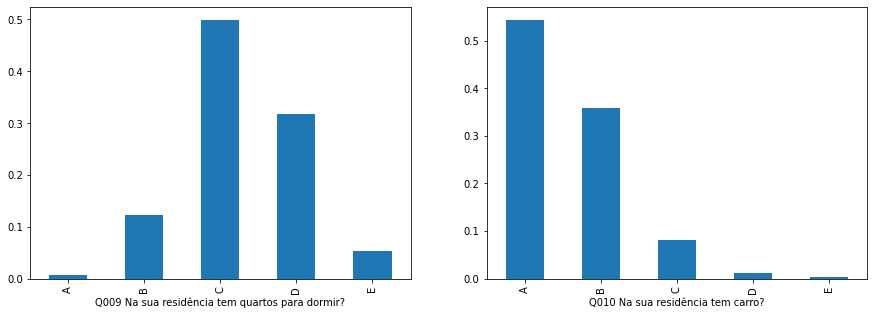

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
variavel = 'Q009'
df[variavel].value_counts(normalize=True).sort_index().plot.bar(ax=axs[0])
axs[0].set_xlabel(f'{variavel} {labels[variavel]}')

variavel = 'Q010'
df[variavel].value_counts(normalize=True).sort_index().plot.bar(ax=axs[1])
axs[1].set_xlabel(f'{variavel} {labels[variavel]}')

plt.show()

In [17]:
df['Q009'].value_counts(normalize=True).loc[['C', 'D', 'E']].sum()

0.8705504416810587

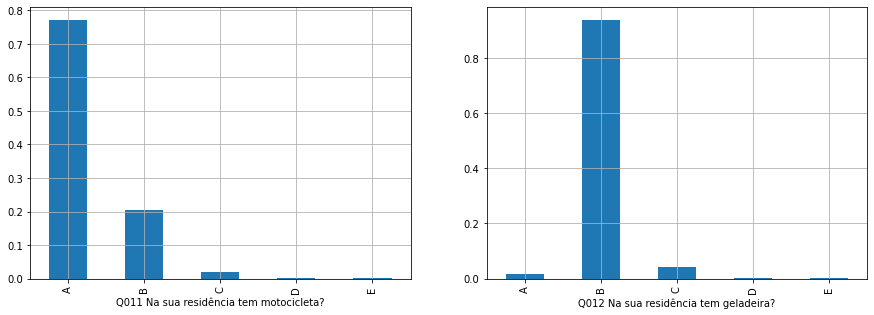

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
variavel = 'Q011'
df[variavel].value_counts(normalize=True).sort_index().plot.bar(ax=axs[0], grid=True)
axs[0].set_xlabel(f'{variavel} {labels[variavel]}')

variavel = 'Q012'
df[variavel].value_counts(normalize=True).sort_index().plot.bar(ax=axs[1], grid=True)
axs[1].set_xlabel(f'{variavel} {labels[variavel]}')

plt.show()

## Correlações

In [19]:
df_categoria = df[provas + colunas[:3]].copy()
for c in colunas[3:]:
    df_categoria[c] = df[c].cat.codes

In [20]:
df_categoria.corr().loc[provas, :]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,IN_ESPECIALIZADO,IN_ESPECIFICO,IN_RECURSO,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,TP_ESCOLA,TP_ENSINO
NU_NOTA_CN,1.000000,0.669247,0.642877,0.648031,0.505337,0.006405,-0.006035,0.009754,-0.096532,0.430519,0.174082,0.329698,0.196888,0.312548,-0.035608,0.122688,0.051999,-0.101907
NU_NOTA_CH,0.669247,1.000000,0.745167,0.610630,0.530075,0.000863,-0.005563,0.005561,-0.100599,0.393667,0.146438,0.290862,0.172750,0.275362,-0.048449,0.108905,0.040913,-0.075766
NU_NOTA_LC,0.642877,0.745167,1.000000,0.589680,0.538595,-0.015679,-0.004510,-0.008349,-0.106688,0.389440,0.137567,0.288358,0.169631,0.277699,-0.055372,0.111154,0.034232,-0.070637
NU_NOTA_MT,0.648031,0.610630,0.589680,1.000000,0.495625,0.001739,-0.008126,0.005100,-0.076601,0.463578,0.200742,0.356287,0.222478,0.341254,-0.018214,0.133932,0.087851,-0.092934
NU_NOTA_REDACAO,0.505337,0.530075,0.538595,0.495625,1.000000,-0.007560,-0.007966,-0.001631,-0.052598,0.315349,0.131457,0.247698,0.160086,0.220144,-0.026887,0.085100,0.082024,0.007637


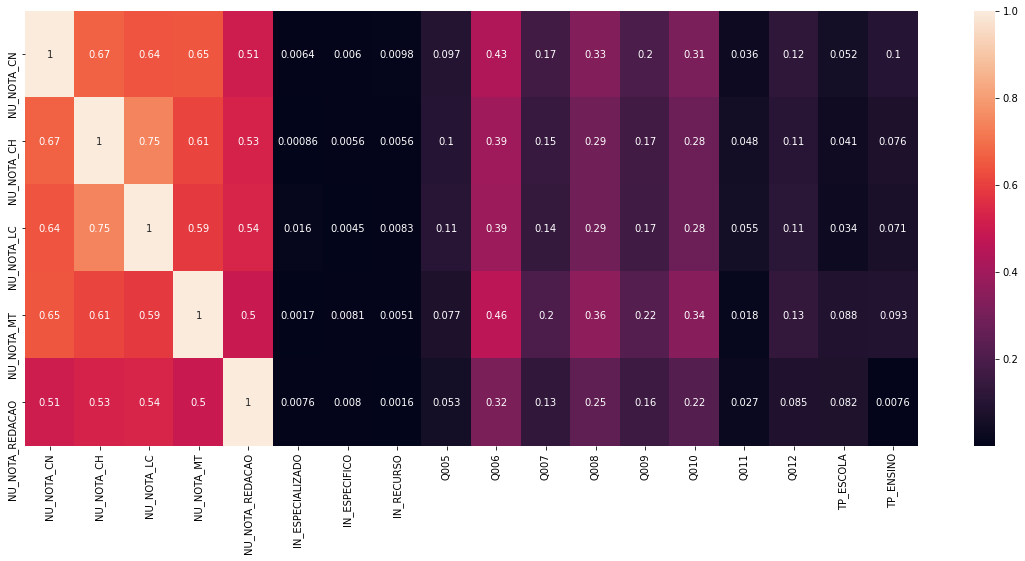

In [21]:
plt.figure(figsize=(20,8))
corr = df_categoria.corr().loc[provas, :].abs()
sns.heatmap(corr, annot=corr, vmax=1)

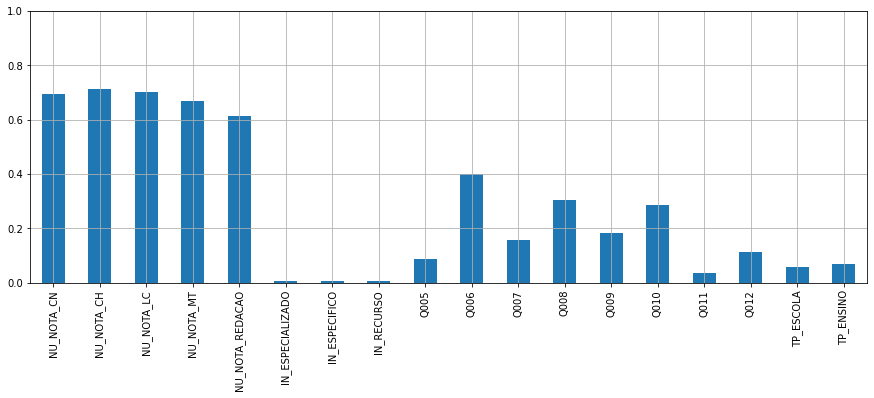

In [22]:
plt.figure(figsize=(15,5))
corr.mean().plot.bar(ylim=(0,1.0), grid=True)

In [23]:
corr.columns[corr.mean() > 0.15]

Index(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'NU_NOTA_REDACAO', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010'],
      dtype='object')

In [24]:
relevante = ['Q006', 'Q007', 'Q008', 'Q009', 'Q010']

In [25]:
def plota_relevante_vs_prova(prova):
    fig, axs = plt.subplots(1, 5, figsize=(24,5))
    for idx, q in enumerate(relevante):
        ax = sns.boxplot(x=q, y=prova, data=df, ax=axs[idx])
        ax.set_ylabel('')
        ax.set_xlabel(q + '\n' +labels[q])
        ax.set_ylim(-50, 1050)
    fig.suptitle(prova)

In [26]:
def plota_boxplot_provas(variavel, rotate=False):
    fig, axs = plt.subplots(1, 5, figsize=(24,5))
    for idx, p in enumerate(provas):
        ax = sns.boxplot(x=variavel, y=p, data=df, ax=axs[idx])
        ax.set_ylim(-50, 1050)
        ax.set_ylabel('')
        ax.set_xlabel(p)
    fig.suptitle(f'{variavel} {labels.get(variavel, "")}')

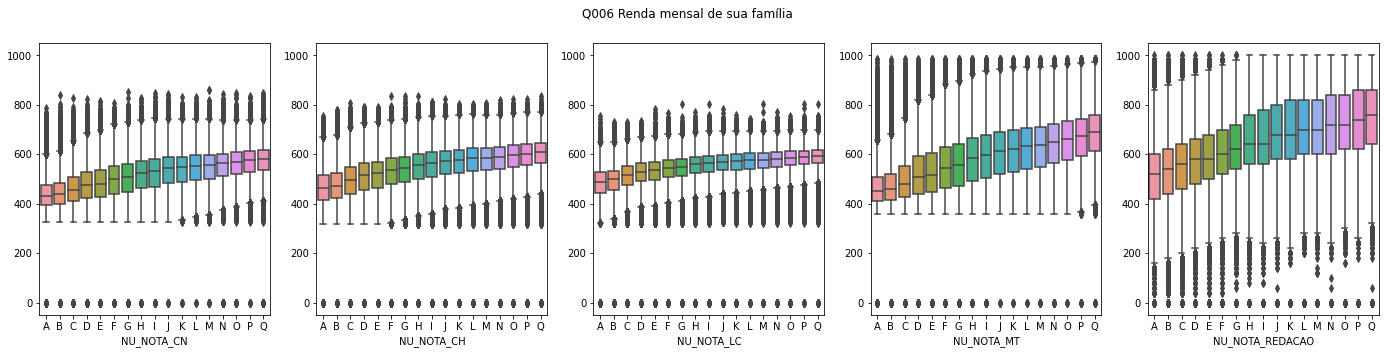

In [27]:
#plota_relevante_vs_prova(provas[0])
plota_boxplot_provas(relevante[0])

{'A': 'Não.', 'B': 'Sim, um ou dois dias por semana.', 'C': 'Sim, três ou quatro dias por semana.', 'D': 'Sim, pelo menos cinco dias por semana.'}


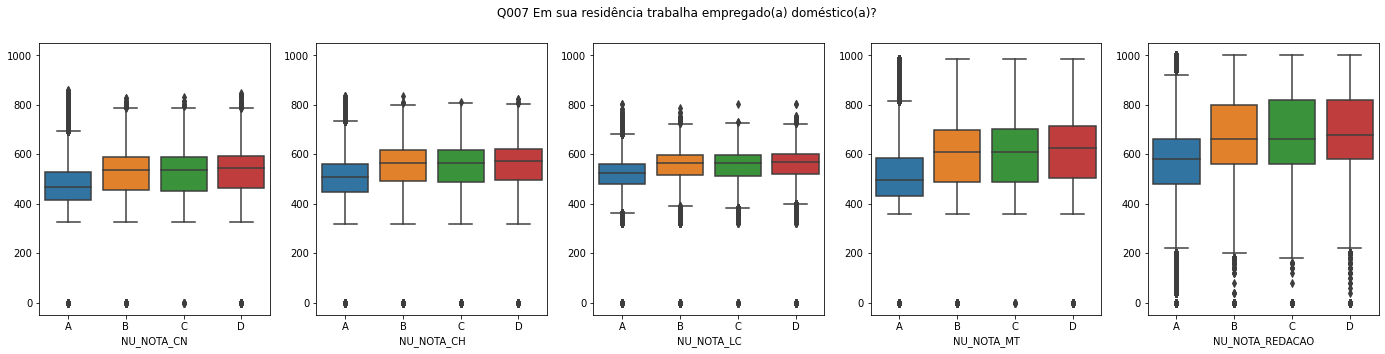

In [27]:
#plota_relevante_vs_prova(provas[1])
print(categorias[relevante[1]])
plota_boxplot_provas(relevante[1])

{'A': 'Não.', 'B': 'Sim, um.', 'C': 'Sim, dois.', 'D': 'Sim, três.', 'E': 'Sim, quatro ou mais.'}


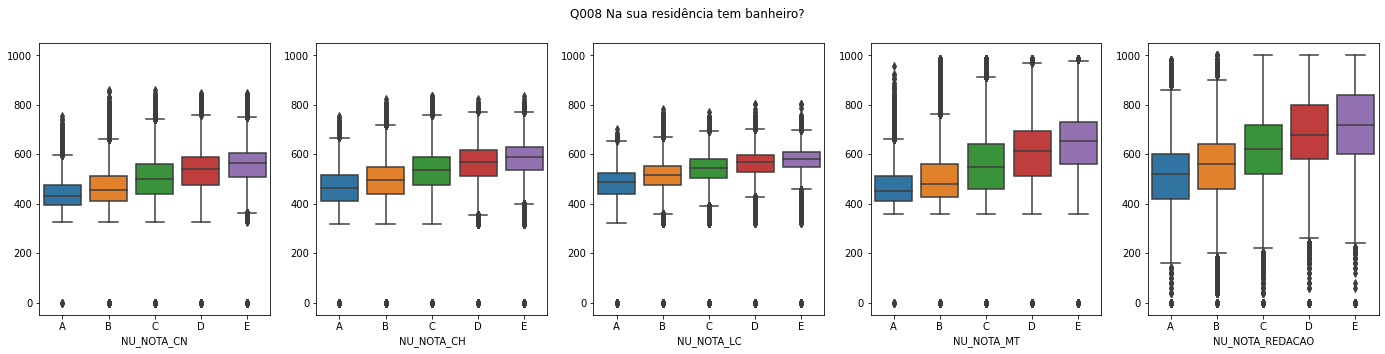

In [28]:
#plota_relevante_vs_prova(provas[2])
print(categorias[relevante[2]])
plota_boxplot_provas(relevante[2])

{'A': 'Não.', 'B': 'Sim, um.', 'C': 'Sim, dois.', 'D': 'Sim, três.', 'E': 'Sim, quatro ou mais.'}


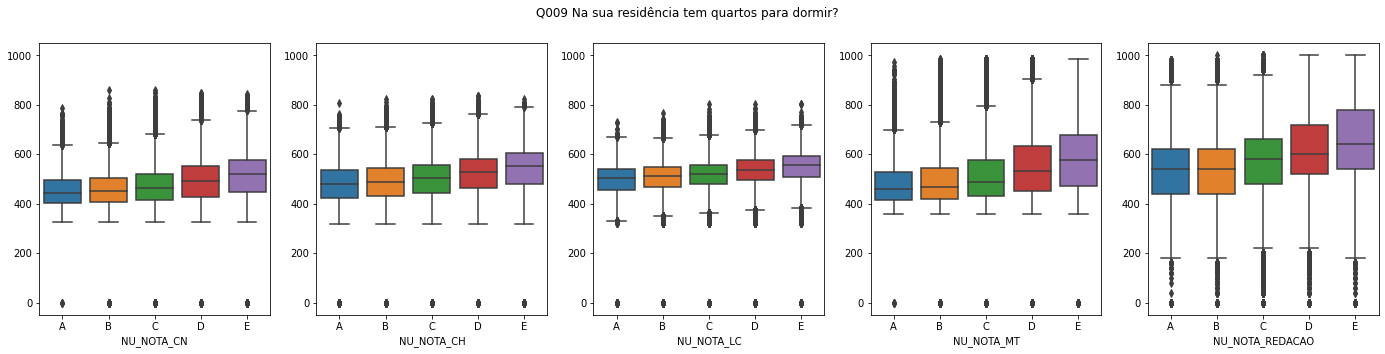

In [29]:
#plota_relevante_vs_prova(provas[3])
print(categorias[relevante[3]])
plota_boxplot_provas(relevante[3])

{'A': 'Não.', 'B': 'Sim, um.', 'C': 'Sim, dois.', 'D': 'Sim, três.', 'E': 'Sim, quatro ou mais.'}


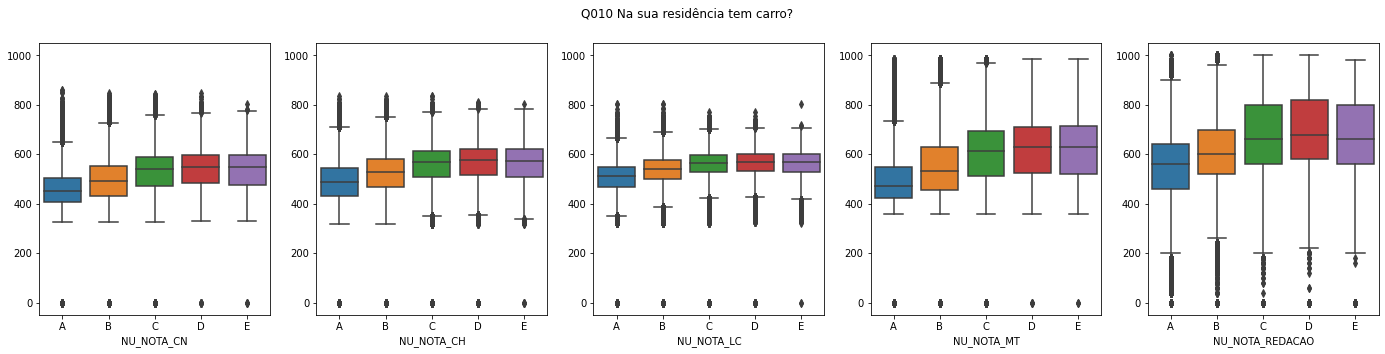

In [30]:
#plota_relevante_vs_prova(provas[4])
print(categorias[relevante[4]])
plota_boxplot_provas(relevante[4])

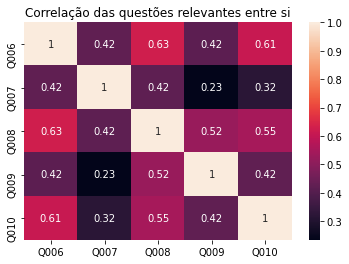

In [31]:
corr_questoes = df_categoria[relevante].corr()
plt.title('Correlação das questões relevantes entre si')
sns.heatmap(corr_questoes, annot=corr_questoes)

## Conclusões
> Lembrando que essas conclusões são para participantes que realizaram pelo menos uma prova

**DISTRIBUIÇÕES E CARACTERÍSTICAS**
- A quantidade de alunos com pedido de atendimento específico, especializado ou recurso é muito pequena.
- Mais de 65% dos participantes não indicaram se estudaram em escola pública, particular ou no exterior (`TP_ESCOLA`)
- Não houve alunos do EJA e a quantidade de participantes que estudaram na Educação Especial - Modalidade Substitutiva não chega a 0.5% (`TP_ENSINO`)
- Cerca de 70% dos alunos moram com até 4 pessoas (`Q005`)
- Mais de 50% dos participantes tem renda mensal familiar de até R$ 1497,00 (`Q006`)
- Na residência de mais de 90% dos participantes, não trabalha um(a) empregado(a) doméstico(a) (`Q007`)
- A quantidade de participantes com casa sem banheiro é quase ínfima (`Q008`)
- Quase 90% dos candidatos tem pelo menos 2 quartos na residência (`Q009`)
- Mais de 50% dos participantes não possuem um carro em casa (`Q010`)
- Aproximadamente 20% das famílias tem pelo menos uma motocicleta (`Q011`)
- A grande maioria dos concorrentes possuem apenas 1 geladeira (`Q012`)

**CORRELAÇÃO**
- As provas tem uma boa correlação uma com as outras.
- O pedido de atendimento específico, especializado ou recurso tem relação quase insignificante com as notas.
- A questão `Q012` (geladeira) possui maior correlação com as notas do que a questão `Q011` (motocicleta)
- As questões que mais impactam na nota são `Q006`, `Q008` e `Q010` e elas possuem uma positiva e consideravel correlação entre si